<a href="https://colab.research.google.com/github/MegWho/ASADE/blob/main/ComparingTelescopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import os

# Create an "images" folder in Colab
os.makedirs("images", exist_ok=True)

# Upload files manually
uploaded = files.upload()

# Move uploaded files to the "images" folder
for filename in uploaded.keys():
    os.rename(filename, os.path.join("images", filename))

print("✅ Images uploaded successfully to '/content/images/'")

Saving hubble_deep.jpg to hubble_deep.jpg
Saving jwst_tarantula.png to jwst_tarantula.png
Saving hubble_tarantula.png to hubble_tarantula.png
Saving hubble_cartwheel.jpg to hubble_cartwheel.jpg
Saving jwst_cartwheel.png to jwst_cartwheel.png
Saving jwst_pillar.png to jwst_pillar.png
Saving jwst_carina.png to jwst_carina.png
Saving jwst_ring.png to jwst_ring.png
Saving jwst_quintet.png to jwst_quintet.png
Saving jwst_deep.png to jwst_deep.png
Saving hubble_quintet.png to hubble_quintet.png
Saving hubble_ring.png to hubble_ring.png
Saving hubble_carina.png to hubble_carina.png
Saving hubble_pillar.png to hubble_pillar.png
✅ Images uploaded successfully to '/content/images/'


In [ ]:
!ls /content/

images	sample_data


In [ ]:
!ls /content/images/

hubble_carina.png     hubble_quintet.png    jwst_cartwheel.png	jwst_ring.png
hubble_cartwheel.jpg  hubble_ring.png	    jwst_deep.png	jwst_tarantula.png
hubble_deep.jpg       hubble_tarantula.png  jwst_pillar.png
hubble_pillar.png     jwst_carina.png	    jwst_quintet.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the folder path where images are stored
image_folder = "/content/images/"

# List of Hubble & JWST image filenames
image_pairs = [
    ("hubble_pillar.png", "jwst_pillar.png"),
    ("hubble_carina.png", "jwst_carina.png"),
    ("hubble_ring.png", "jwst_ring.png"),
    ("hubble_quintet.png", "jwst_quintet.png"),
    ("hubble_deep.jpg", "jwst_deep.png"),
    ("hubble_cartwheel.jpg", "jwst_cartwheel.png"),
    ("hubble_tarantula.png", "jwst_tarantula.png")
]

# Set standard image size
IMG_SIZE = (512, 512)  # Resize all images to 512x512

# lists for processed images
hubble_images = []
jwst_images = []

# Load, preprocess, and store images
for hubble_img, jwst_img in image_pairs:
    # Load Hubble image
    hubble_path = os.path.join(image_folder, hubble_img)
    hubble = cv2.imread(hubble_path)  # Read image
    hubble = cv2.resize(hubble, IMG_SIZE)  # Resize
    hubble_gray = cv2.cvtColor(hubble, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    hubble_norm = hubble_gray / 255.0  # Normalize pixel values (0-1)
    hubble_images.append(hubble_norm)

    # Load JWST image
    jwst_path = os.path.join(image_folder, jwst_img)
    jwst = cv2.imread(jwst_path)  # Read image
    jwst = cv2.resize(jwst, IMG_SIZE)  # Resize
    jwst_gray = cv2.cvtColor(jwst, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    jwst_norm = jwst_gray / 255.0  # Normalize pixel values (0-1)
    jwst_images.append(jwst_norm)

print(f"✅ Successfully loaded and preprocessed {len(hubble_images)} Hubble and {len(jwst_images)} JWST images.")

# Convert lists to NumPy arrays for further processing
hubble_images = np.array(hubble_images)
jwst_images = np.array(jwst_images)

✅ Successfully loaded and preprocessed 7 Hubble and 7 JWST images.


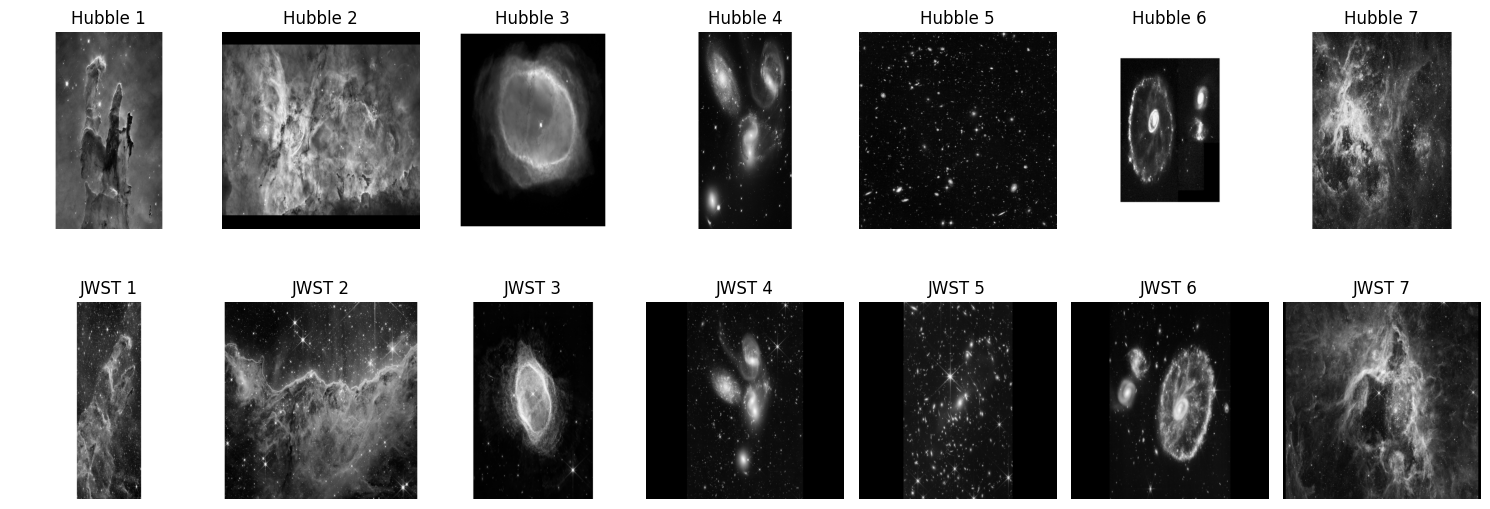

In [ ]:
import matplotlib.pyplot as plt

# Number of images
num_images = len(hubble_images)  # Should be 7 (pairs)

# Create a figure with 2 rows (Hubble & JWST) and 7 columns (image pairs)
fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

# Loop through and display each image
for i in range(num_images):
    # Display Hubble image (Row 1)
    axes[0, i].imshow(hubble_images[i], cmap="gray")
    axes[0, i].set_title(f"Hubble {i+1}")
    axes[0, i].axis("off")  # Hide axes

    # Display JWST image (Row 2)
    axes[1, i].imshow(jwst_images[i], cmap="gray")
    axes[1, i].set_title(f"JWST {i+1}")
    axes[1, i].axis("off")  # Hide axes

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# ***Feature Extraction***


### **1. Brightness**

In [ ]:
import numpy as np

# Function to calculate brightness
def calculate_brightness(image):
    return np.mean(image)  # Mean pixel intensity

# Compare brightness for all images
for i in range(len(hubble_images)):
    hubble_brightness = calculate_brightness(hubble_images[i])
    jwst_brightness = calculate_brightness(jwst_images[i])

    print(f"Image {i+1}: Hubble Brightness = {hubble_brightness:.2f}, JWST Brightness = {jwst_brightness:.2f}")

Image 1: Hubble Brightness = 0.63, JWST Brightness = 0.76
Image 2: Hubble Brightness = 0.37, JWST Brightness = 0.33
Image 3: Hubble Brightness = 0.42, JWST Brightness = 0.47
Image 4: Hubble Brightness = 0.61, JWST Brightness = 0.07
Image 5: Hubble Brightness = 0.06, JWST Brightness = 0.07
Image 6: Hubble Brightness = 0.69, JWST Brightness = 0.09
Image 7: Hubble Brightness = 0.51, JWST Brightness = 0.24


In [ ]:
import numpy as np

# Function to calculate brightness
def calculate_brightness(image):
    return np.mean(image)  # Mean pixel intensity

# Image name pairs
image_pairs = [
    ("Pillars of Creation", "Pillars of Creation"),
    ("Carina Nebula", "Carina Nebula"),
    ("Southern Ring Nebula", "Southern Ring Nebula"),
    ("Stephan's Quintet", "Stephan's Quintet"),
    ("Deep Field (SMACS 0723)", "Deep Field"),
    ("Cartwheel Galaxy", "Cartwheel Galaxy"),
    ("Tarantula Nebula", "Tarantula Nebula")
]

# Compare brightness for all images with proper names
for i in range(len(hubble_images)):
    hubble_brightness = calculate_brightness(hubble_images[i])
    jwst_brightness = calculate_brightness(jwst_images[i])

    hubble_name, jwst_name = image_pairs[i]
    print(f"{hubble_name}: Hubble Brightness = {hubble_brightness:.2f}, JWST Brightness = {jwst_brightness:.2f}")

Pillars of Creation: Hubble Brightness = 0.63, JWST Brightness = 0.76
Carina Nebula: Hubble Brightness = 0.37, JWST Brightness = 0.33
Southern Ring Nebula: Hubble Brightness = 0.42, JWST Brightness = 0.47
Stephan's Quintet: Hubble Brightness = 0.61, JWST Brightness = 0.07
Deep Field (SMACS 0723): Hubble Brightness = 0.06, JWST Brightness = 0.07
Cartwheel Galaxy: Hubble Brightness = 0.69, JWST Brightness = 0.09
Tarantula Nebula: Hubble Brightness = 0.51, JWST Brightness = 0.24


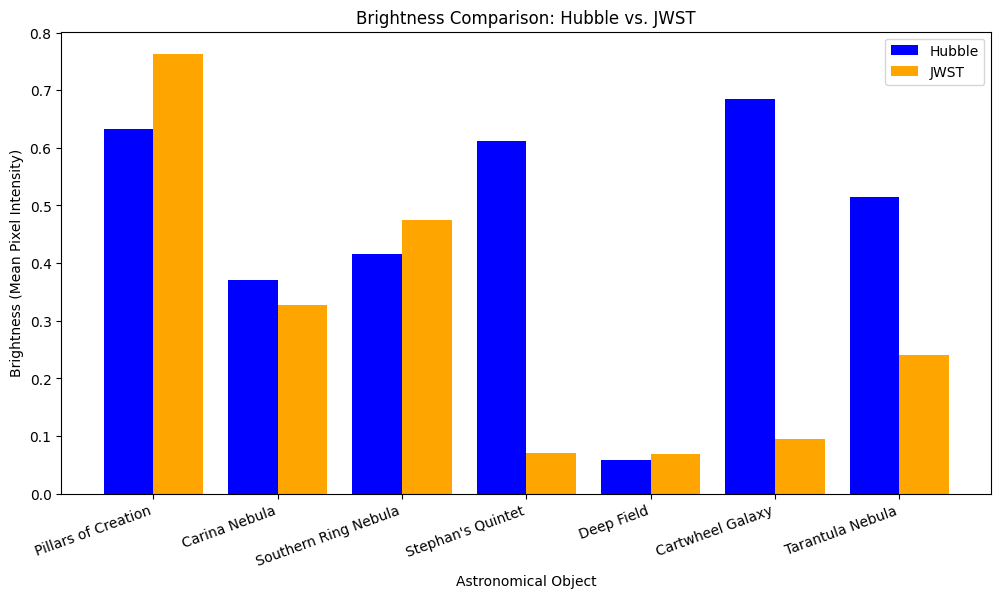

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate brightness
def calculate_brightness(image):
    return np.mean(image)  # Mean pixel intensity

# Image names for labeling
image_names = [
    "Pillars of Creation",
    "Carina Nebula",
    "Southern Ring Nebula",
    "Stephan's Quintet",
    "Deep Field",
    "Cartwheel Galaxy",
    "Tarantula Nebula"
]

# Calculate brightness for all images
hubble_brightness = [calculate_brightness(img) for img in hubble_images]
jwst_brightness = [calculate_brightness(img) for img in jwst_images]

# Plot bar chart
x = np.arange(len(image_names))  # X-axis positions

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, hubble_brightness, width=0.4, label="Hubble", color="blue")
plt.bar(x + 0.2, jwst_brightness, width=0.4, label="JWST", color="orange")

# Labels and Title
plt.xlabel("Astronomical Object")
plt.ylabel("Brightness (Mean Pixel Intensity)")
plt.title("Brightness Comparison: Hubble vs. JWST")
plt.xticks(ticks=x, labels=image_names, rotation=20, ha="right")  # Rotate names for readability
plt.legend()  # Show legend

# Show plot
plt.show()

### **2. Contrast**

In [13]:
# Function to calculate contrast (standard deviation of pixel values)
def calculate_contrast(image):
    return np.std(image)

# Compare contrast for all images
for i in range(len(hubble_images)):
    hubble_contrast = calculate_contrast(hubble_images[i])
    jwst_contrast = calculate_contrast(jwst_images[i])

    print(f"Image {i+1}: Hubble Contrast = {hubble_contrast:.2f}, JWST Contrast = {jwst_contrast:.2f}")

Image 1: Hubble Contrast = 0.35, JWST Contrast = 0.35
Image 2: Hubble Contrast = 0.21, JWST Contrast = 0.20
Image 3: Hubble Contrast = 0.41, JWST Contrast = 0.45
Image 4: Hubble Contrast = 0.43, JWST Contrast = 0.13
Image 5: Hubble Contrast = 0.08, JWST Contrast = 0.10
Image 6: Hubble Contrast = 0.43, JWST Contrast = 0.16
Image 7: Hubble Contrast = 0.35, JWST Contrast = 0.17


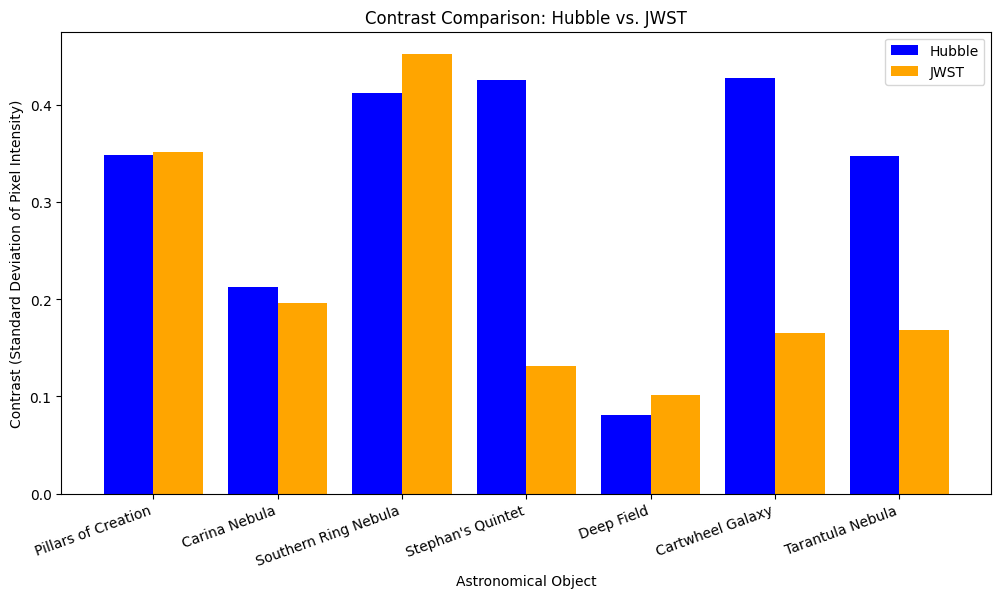

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate contrast (Standard Deviation of pixel values)
def calculate_contrast(image):
    return np.std(image)  # Standard deviation of pixel intensity

# Image names for labeling
image_names = [
    "Pillars of Creation",
    "Carina Nebula",
    "Southern Ring Nebula",
    "Stephan's Quintet",
    "Deep Field",
    "Cartwheel Galaxy",
    "Tarantula Nebula"
]

# Calculate contrast for all images
hubble_contrast = [calculate_contrast(img) for img in hubble_images]
jwst_contrast = [calculate_contrast(img) for img in jwst_images]

# Plot bar chart
x = np.arange(len(image_names))  # X-axis positions

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, hubble_contrast, width=0.4, label="Hubble", color="blue")
plt.bar(x + 0.2, jwst_contrast, width=0.4, label="JWST", color="orange")

# Labels and Title
plt.xlabel("Astronomical Object")
plt.ylabel("Contrast (Standard Deviation of Pixel Intensity)")
plt.title("Contrast Comparison: Hubble vs. JWST")
plt.xticks(ticks=x, labels=image_names, rotation=20, ha="right")  # Rotate names for readability
plt.legend()  # Show legend

# Show plot
plt.show()

### **3. Sharpness**

In [15]:
import numpy as np

# Function to compute image sharpness using Fourier Transform
def calculate_sharpness(image):
    f_transform = np.fft.fft2(image)  # Apply Fourier Transform
    f_shift = np.fft.fftshift(f_transform)  # Shift zero-frequency components to the center
    magnitude_spectrum = np.abs(f_shift)  # Get magnitudes
    return np.mean(magnitude_spectrum)  # Average of frequency magnitudes

# Compare sharpness for all images
for i in range(len(hubble_images)):
    hubble_sharpness = calculate_sharpness(hubble_images[i])
    jwst_sharpness = calculate_sharpness(jwst_images[i])

    print(f"Image {i+1}: Hubble Sharpness = {hubble_sharpness:.2f}, JWST Sharpness = {jwst_sharpness:.2f}")

Image 1: Hubble Sharpness = 16.63, JWST Sharpness = 21.00
Image 2: Hubble Sharpness = 17.98, JWST Sharpness = 26.31
Image 3: Hubble Sharpness = 12.98, JWST Sharpness = 14.28
Image 4: Hubble Sharpness = 16.17, JWST Sharpness = 16.59
Image 5: Hubble Sharpness = 25.74, JWST Sharpness = 18.45
Image 6: Hubble Sharpness = 19.47, JWST Sharpness = 15.40
Image 7: Hubble Sharpness = 27.41, JWST Sharpness = 21.23


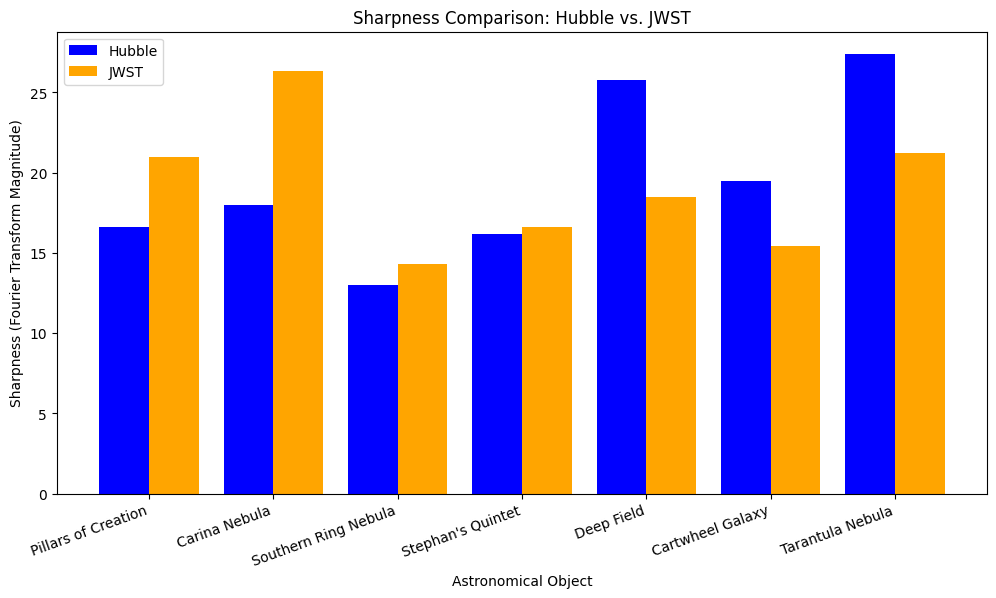

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute image sharpness using Fourier Transform
def calculate_sharpness(image):
    f_transform = np.fft.fft2(image)  # Apply Fourier Transform
    f_shift = np.fft.fftshift(f_transform)  # Shift zero-frequency components to the center
    magnitude_spectrum = np.abs(f_shift)  # Get magnitudes
    return np.mean(magnitude_spectrum)  # Average of frequency magnitudes

# Image names for labeling
image_names = [
    "Pillars of Creation",
    "Carina Nebula",
    "Southern Ring Nebula",
    "Stephan's Quintet",
    "Deep Field",
    "Cartwheel Galaxy",
    "Tarantula Nebula"
]

# Calculate sharpness for all images
hubble_sharpness = [calculate_sharpness(img) for img in hubble_images]
jwst_sharpness = [calculate_sharpness(img) for img in jwst_images]

# Plot bar chart
x = np.arange(len(image_names))  # X-axis positions

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, hubble_sharpness, width=0.4, label="Hubble", color="blue")
plt.bar(x + 0.2, jwst_sharpness, width=0.4, label="JWST", color="orange")

# Labels and Title
plt.xlabel("Astronomical Object")
plt.ylabel("Sharpness (Fourier Transform Magnitude)")
plt.title("Sharpness Comparison: Hubble vs. JWST")
plt.xticks(ticks=x, labels=image_names, rotation=20, ha="right")  # Rotate names for readability
plt.legend()  # Show legend

# Show plot
plt.show()

### **4. Edge Detection**

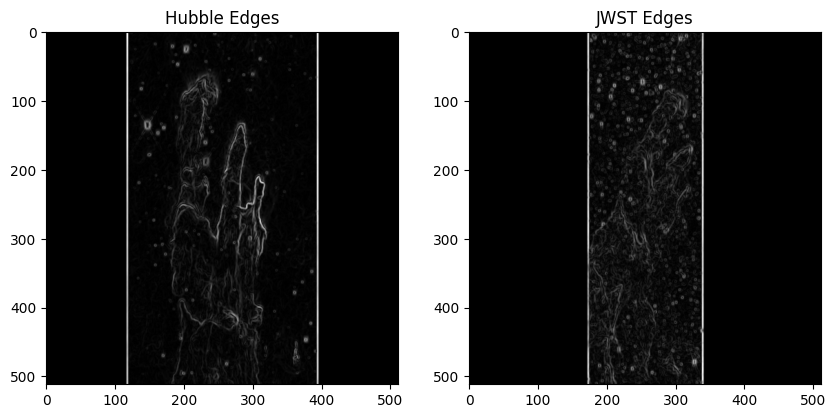

In [17]:
import cv2
import matplotlib.pyplot as plt

# Function to apply Sobel edge detection
def apply_sobel(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges
    sobel_combined = np.sqrt(sobelx**2 + sobely**2)  # Combine both
    return sobel_combined

# Display edge detection results for first pair
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(apply_sobel(hubble_images[0]), cmap="gray")
plt.title("Hubble Edges")

plt.subplot(1, 2, 2)
plt.imshow(apply_sobel(jwst_images[0]), cmap="gray")
plt.title("JWST Edges")

plt.show()

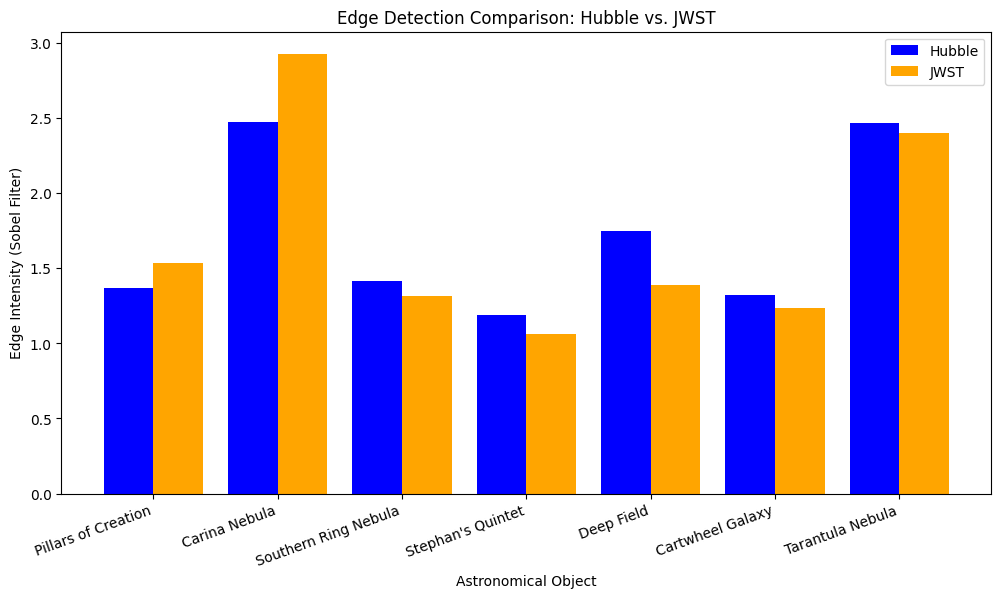

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply Sobel edge detection and compute edge intensity
def calculate_edge_intensity(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Detect horizontal edges
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Detect vertical edges
    sobel_combined = np.sqrt(sobelx**2 + sobely**2)  # Combine horizontal and vertical edges
    return np.mean(sobel_combined)  # Compute average edge intensity

# Image names for labeling
image_names = [
    "Pillars of Creation",
    "Carina Nebula",
    "Southern Ring Nebula",
    "Stephan's Quintet",
    "Deep Field",
    "Cartwheel Galaxy",
    "Tarantula Nebula"
]

# Calculate edge intensity for all images
hubble_edges = [calculate_edge_intensity(img) for img in hubble_images]
jwst_edges = [calculate_edge_intensity(img) for img in jwst_images]

# Plot bar chart
x = np.arange(len(image_names))  # X-axis positions

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, hubble_edges, width=0.4, label="Hubble", color="blue")
plt.bar(x + 0.2, jwst_edges, width=0.4, label="JWST", color="orange")

# Labels and Title
plt.xlabel("Astronomical Object")
plt.ylabel("Edge Intensity (Sobel Filter)")
plt.title("Edge Detection Comparison: Hubble vs. JWST")
plt.xticks(ticks=x, labels=image_names, rotation=20, ha="right")  # Rotate names for readability
plt.legend()  # Show legend

# Show plot
plt.show()

# **Analysis :**

In [19]:
import pandas as pd

# Create DataFrame for analysis
data = pd.DataFrame({
    "Object": image_names,
    "Hubble Brightness": hubble_brightness,
    "JWST Brightness": jwst_brightness,
    "Hubble Contrast": hubble_contrast,
    "JWST Contrast": jwst_contrast,
    "Hubble Sharpness": hubble_sharpness,
    "JWST Sharpness": jwst_sharpness,
    "Hubble Edge Intensity": hubble_edges,
    "JWST Edge Intensity": jwst_edges
})

# Compute mean and standard deviation for feature comparison
summary_stats = data.describe()
print(summary_stats)

       Hubble Brightness  JWST Brightness  Hubble Contrast  JWST Contrast  \
count           7.000000         7.000000         7.000000       7.000000   
mean            0.469812         0.291375         0.322155       0.223748   
std             0.215251         0.257310         0.130281       0.128902   
min             0.057749         0.069240         0.080651       0.101386   
25%             0.393006         0.082459         0.279744       0.148036   
50%             0.514291         0.240230         0.348573       0.168217   
75%             0.622748         0.400922         0.419323       0.273778   
max             0.685138         0.763393         0.427728       0.453006   

       Hubble Sharpness  JWST Sharpness  Hubble Edge Intensity  \
count          7.000000        7.000000               7.000000   
mean          19.483282       19.038440               1.710847   
std            5.255244        4.158373               0.546077   
min           12.983808       14.284906   

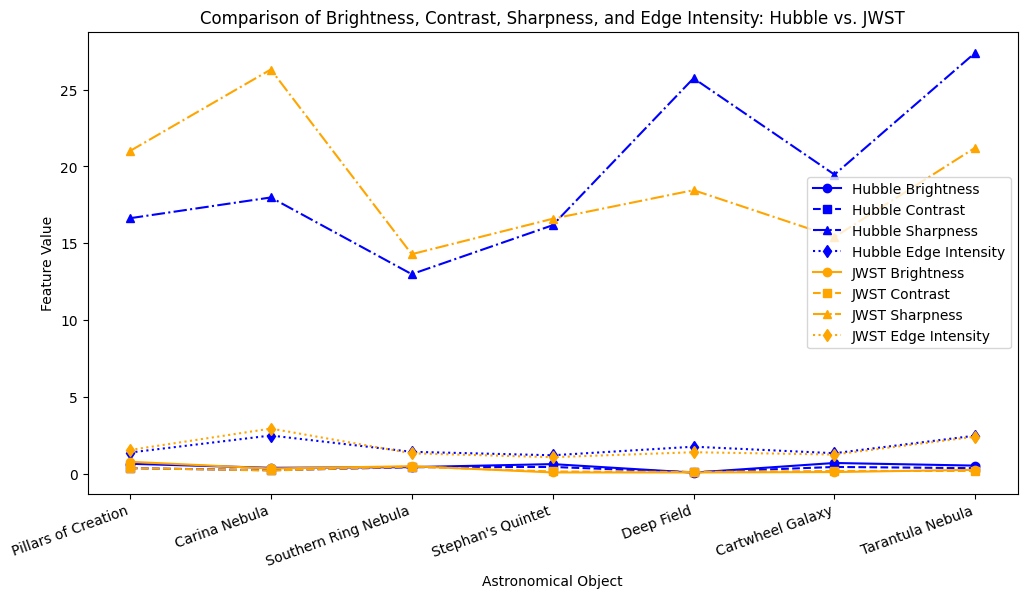

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Image names for labeling
image_names = [
    "Pillars of Creation",
    "Carina Nebula",
    "Southern Ring Nebula",
    "Stephan's Quintet",
    "Deep Field",
    "Cartwheel Galaxy",
    "Tarantula Nebula"
]

# X-axis positions
x = np.arange(len(image_names))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each feature for Hubble
plt.plot(x, hubble_brightness, marker="o", linestyle="-", color="blue", label="Hubble Brightness")
plt.plot(x, hubble_contrast, marker="s", linestyle="--", color="blue", label="Hubble Contrast")
plt.plot(x, hubble_sharpness, marker="^", linestyle="-.", color="blue", label="Hubble Sharpness")
plt.plot(x, hubble_edges, marker="d", linestyle=":", color="blue", label="Hubble Edge Intensity")

# Plot each feature for JWST
plt.plot(x, jwst_brightness, marker="o", linestyle="-", color="orange", label="JWST Brightness")
plt.plot(x, jwst_contrast, marker="s", linestyle="--", color="orange", label="JWST Contrast")
plt.plot(x, jwst_sharpness, marker="^", linestyle="-.", color="orange", label="JWST Sharpness")
plt.plot(x, jwst_edges, marker="d", linestyle=":", color="orange", label="JWST Edge Intensity")

# Labels and Title
plt.xlabel("Astronomical Object")
plt.ylabel("Feature Value")
plt.title("Comparison of Brightness, Contrast, Sharpness, and Edge Intensity: Hubble vs. JWST")
plt.xticks(ticks=x, labels=image_names, rotation=20, ha="right")  # Rotate names for readability
plt.legend()  # Show legend

# Show plot
plt.show()

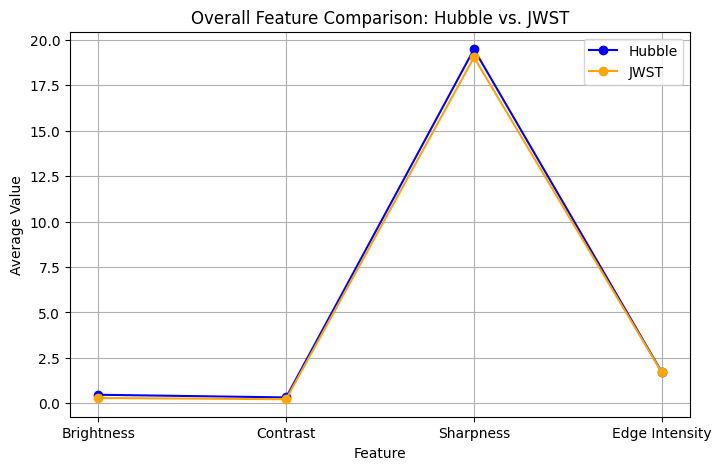

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Compute average feature values across all objects
hubble_avg = [
    np.mean(hubble_brightness),
    np.mean(hubble_contrast),
    np.mean(hubble_sharpness),
    np.mean(hubble_edges)
]

jwst_avg = [
    np.mean(jwst_brightness),
    np.mean(jwst_contrast),
    np.mean(jwst_sharpness),
    np.mean(jwst_edges)
]

# Feature names
features = ["Brightness", "Contrast", "Sharpness", "Edge Intensity"]

# X-axis positions
x = np.arange(len(features))

# Line Plot
plt.figure(figsize=(8, 5))
plt.plot(x, hubble_avg, marker="o", linestyle="-", color="blue", label="Hubble")
plt.plot(x, jwst_avg, marker="o", linestyle="-", color="orange", label="JWST")

# Labels and Title
plt.xlabel("Feature")
plt.ylabel("Average Value")
plt.title("Overall Feature Comparison: Hubble vs. JWST")
plt.xticks(ticks=x, labels=features)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Convert features into a structured DataFrame
data = pd.DataFrame({
    "Hubble Brightness": hubble_brightness,
    "Hubble Contrast": hubble_contrast,
    "Hubble Sharpness": hubble_sharpness,
    "Hubble Edge Intensity": hubble_edges,
    "JWST Brightness": jwst_brightness,
    "JWST Contrast": jwst_contrast,
    "JWST Sharpness": jwst_sharpness,
    "JWST Edge Intensity": jwst_edges
})

# Define input features (Hubble) and target values (JWST)
X = data[["Hubble Brightness", "Hubble Contrast", "Hubble Sharpness", "Hubble Edge Intensity"]]
y = data[["JWST Brightness", "JWST Contrast", "JWST Sharpness", "JWST Edge Intensity"]]

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict JWST features using Hubble features
y_pred = model.predict(X_test)

In [28]:
# Calculate model accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")  # Closer to 1 means better prediction

Mean Squared Error (MSE): 11.31
R² Score: -4.26


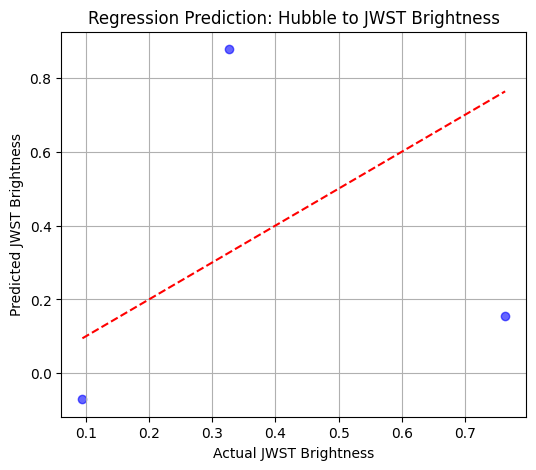

In [29]:
# Plot actual vs. predicted values for JWST Brightness
plt.figure(figsize=(6, 5))
plt.scatter(y_test["JWST Brightness"], y_pred[:, 0], color="blue", alpha=0.6)
plt.plot([min(y_test["JWST Brightness"]), max(y_test["JWST Brightness"])],
         [min(y_test["JWST Brightness"]), max(y_test["JWST Brightness"])],
         color="red", linestyle="--")  # Regression line

plt.xlabel("Actual JWST Brightness")
plt.ylabel("Predicted JWST Brightness")
plt.title("Regression Prediction: Hubble to JWST Brightness")
plt.grid(True)
plt.show()

# **Folium / Map**

In [30]:
!pip install folium  # Install if not already installed
import folium

In [33]:
# Dictionary of telescope launch sites
launch_sites = {
    "Hubble Space Telescope - Kennedy Space Center 🇺🇸": [28.5721, -80.6480],  # Florida, USA
    "James Webb Space Telescope - Guiana Space Centre 🇫🇷": [5.236, -52.768]  # Kourou, French Guiana
}

In [34]:
# Initialize Folium map centered at a mid-point between launch sites
m = folium.Map(location=[15, -65], zoom_start=3)

# Add markers for launch sites
for name, coords in launch_sites.items():
    folium.Marker(
        location=coords,
        popup=name,
        icon=folium.Icon(color="blue", icon="rocket")
    ).add_to(m)

# Show the map
m